In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [2]:

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# Draw Graphs comparing loss and accuracy
def plot_graph(train_history):
  # Plot training & validation loss values
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(train_history.history['loss'], label='Training Loss')
  plt.plot(train_history.history['val_loss'], label='Validation Loss')
  plt.title('Model Loss ')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # Plot training & validation accuracy values
  plt.subplot(1, 2, 2)
  plt.plot(train_history.history['accuracy'], label='Training Accuracy')
  plt.plot(train_history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Model Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()


## 0
CNN neural network with 3 layer of Conv2d

In [4]:


# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 output classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])




In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/40
1563/1563 [==============================] - 20s 5ms/step - loss: 1.5213 - accuracy: 0.4417 - val_loss: 1.2546 - val_accuracy: 0.5456
Epoch 2/40
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1648 - accuracy: 0.5848 - val_loss: 1.0953 - val_accuracy: 0.6148
Epoch 3/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0216 - accuracy: 0.6401 - val_loss: 1.0171 - val_accuracy: 0.6435
Epoch 4/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9315 - accuracy: 0.6730 - val_loss: 0.9824 - val_accuracy: 0.6588
Epoch 5/40
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8614 - accuracy: 0.6973 - val_loss: 0.9234 - val_accuracy: 0.6790
Epoch 6/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8108 - accuracy: 0.7152 - val_loss: 0.9044 - val_accuracy: 0.6834
Epoch 7/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7560 - accuracy: 0.7347 - val_loss: 0.8732 - val_accuracy

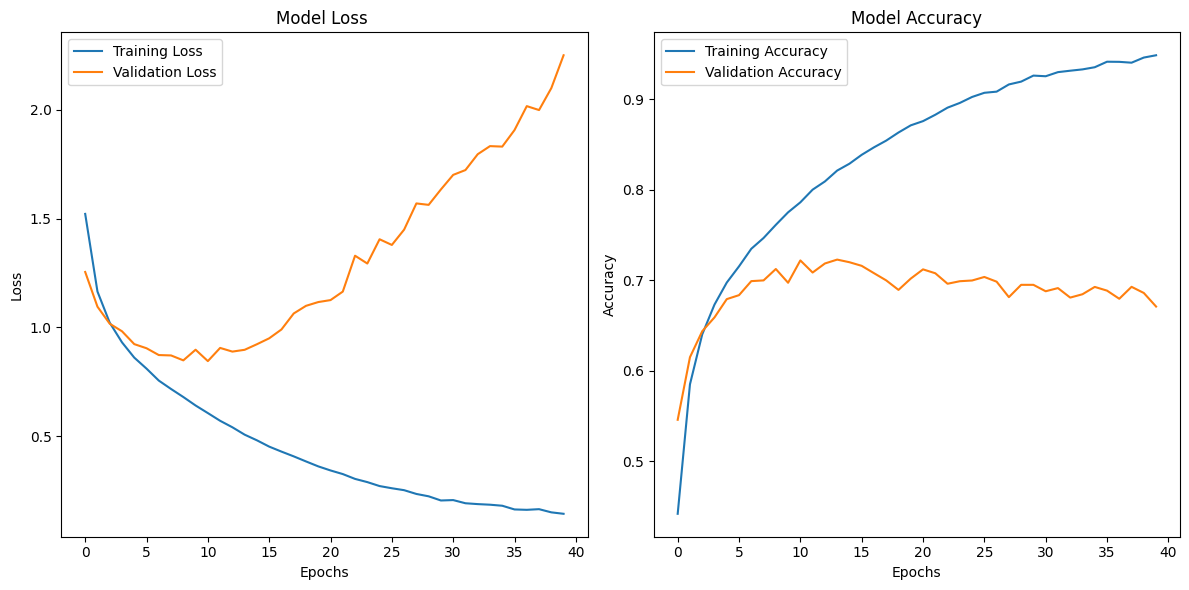

In [7]:
plot_graph(history)

## 1.
 Batch Normalization is a technique used in deep neural networks to improve training stability and convergence speed. It normalizes the activations of each layer in a mini-batch by subtracting the batch mean and dividing by the batch standard deviation. This helps to mitigate issues like vanishing or exploding gradients and allows for faster training. In Keras, we can easily add Batch Normalization layers to your model.

In [8]:
model_batchNormed = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10)  # 10 output classes for CIFAR-10

])

# Compile the model
model_batchNormed.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [9]:
model_batchNormed.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                      

In [10]:
# Train the model
history_model_batchNormed = model_batchNormed.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model_batchNormed.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/40
1563/1563 [==============================] - 14s 7ms/step - loss: 1.3175 - accuracy: 0.5333 - val_loss: 1.6244 - val_accuracy: 0.4804
Epoch 2/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9647 - accuracy: 0.6616 - val_loss: 1.0570 - val_accuracy: 0.6361
Epoch 3/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8235 - accuracy: 0.7123 - val_loss: 0.9473 - val_accuracy: 0.6693
Epoch 4/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7263 - accuracy: 0.7480 - val_loss: 0.9570 - val_accuracy: 0.6739
Epoch 5/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6499 - accuracy: 0.7739 - val_loss: 1.1577 - val_accuracy: 0.6103
Epoch 6/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5930 - accuracy: 0.7936 - val_loss: 0.8167 - val_accuracy: 0.7273
Epoch 7/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5354 - accuracy: 0.8138 - val_loss: 0.8145 - val_ac

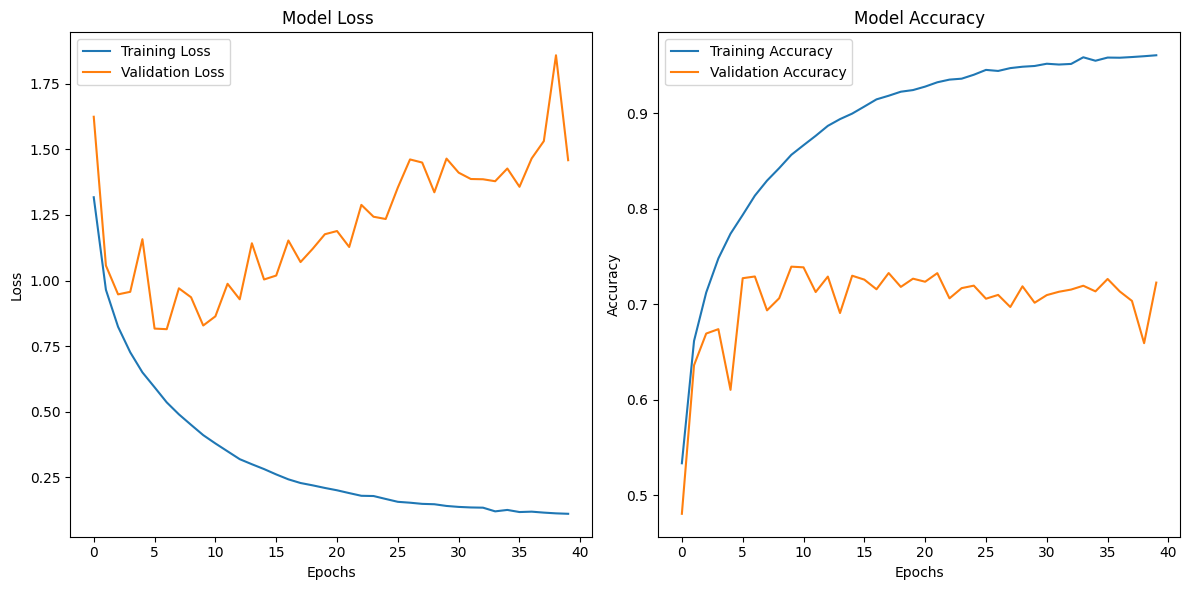

In [11]:
plot_graph(history_model_batchNormed)

##2.
Adding dropout layers to neural network can help prevent overfitting by randomly dropping out (setting to zero) a fraction of the units during each forward and backward pass.

In [12]:
model_dropout = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Add dropout with a 50% dropout rate
    layers.Dense(10)  # 10 output classes for CIFAR-10
])

# Compile the model
model_dropout.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model_dropout.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_4 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                      

In [14]:
# Train the model
history_model_dropout = model_dropout.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model_dropout.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/40
1563/1563 [==============================] - 14s 7ms/step - loss: 1.5667 - accuracy: 0.4552 - val_loss: 1.2207 - val_accuracy: 0.5683
Epoch 2/40
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1441 - accuracy: 0.6008 - val_loss: 1.0032 - val_accuracy: 0.6383
Epoch 3/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9905 - accuracy: 0.6602 - val_loss: 0.9301 - val_accuracy: 0.6721
Epoch 4/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8957 - accuracy: 0.6928 - val_loss: 0.8946 - val_accuracy: 0.6871
Epoch 5/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8247 - accuracy: 0.7235 - val_loss: 0.8455 - val_accuracy: 0.7041
Epoch 6/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7682 - accuracy: 0.7400 - val_loss: 0.8385 - val_accuracy: 0.7110
Epoch 7/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7225 - accuracy: 0.7544 - val_loss: 0.8846 - val_ac

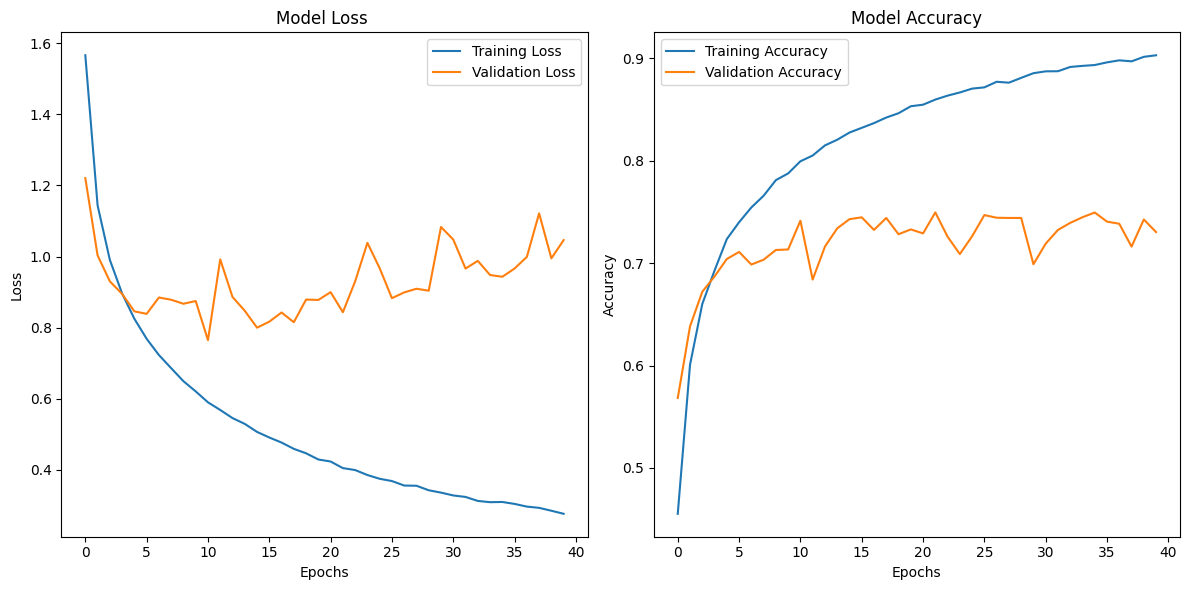

In [15]:
plot_graph(history_model_dropout)

Observation:
Difference between training and validation accuracy is also smaller than pervious methods

##3
Changing count of convoluation and pooling layer. I added two more convolutional layers and pooling layers to create a deeper architecture. You can experiment with different numbers of layers and filter sizes to find the architecture that works best for your specific problem.

In [16]:

# Define the CNN model with Batch Normalization and Dropout
model_deep = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10)
])

# Compile the model
model_deep.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [17]:
model_deep.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_8 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 batch_normalization_9 (Bat  (None, 12, 12, 64)       

In [18]:


# Train the model
history_model_deep = model_deep.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model_deep.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)


Epoch 1/40
1563/1563 [==============================] - 21s 10ms/step - loss: 1.5906 - accuracy: 0.4524 - val_loss: 1.1917 - val_accuracy: 0.5675
Epoch 2/40
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0473 - accuracy: 0.6363 - val_loss: 0.9655 - val_accuracy: 0.6596
Epoch 3/40
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8789 - accuracy: 0.6967 - val_loss: 1.0147 - val_accuracy: 0.6661
Epoch 4/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7751 - accuracy: 0.7358 - val_loss: 0.9766 - val_accuracy: 0.6652
Epoch 5/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6947 - accuracy: 0.7627 - val_loss: 0.8269 - val_accuracy: 0.7182
Epoch 6/40
1563/1563 [==============================] - 13s 9ms/step - loss: 0.6284 - accuracy: 0.7862 - val_loss: 0.8241 - val_accuracy: 0.7244
Epoch 7/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5620 - accuracy: 0.8105 - val_loss: 0.7309 - val_a

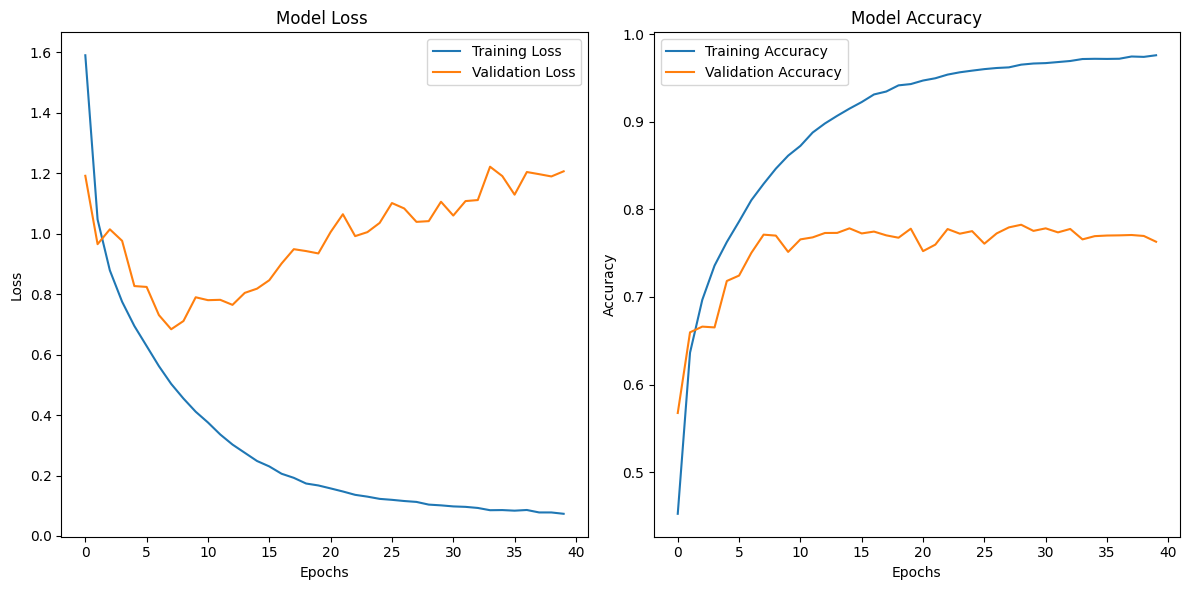

In [19]:
plot_graph(history_model_deep)

## 4
Changing Activation functions

In [20]:
model_acitvation = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='elu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='elu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='elu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='elu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Add dropout with a 50% dropout rate
    layers.Dense(10)  # 10 output classes for CIFAR-10
])

# Compile the model
model_acitvation.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:

# Train the model
history_model_acitvation = model_acitvation.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model_acitvation.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/40
1563/1563 [==============================] - 16s 7ms/step - loss: 1.5272 - accuracy: 0.4734 - val_loss: 1.2802 - val_accuracy: 0.5400
Epoch 2/40
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1130 - accuracy: 0.6117 - val_loss: 1.2110 - val_accuracy: 0.5601
Epoch 3/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9632 - accuracy: 0.6698 - val_loss: 1.0434 - val_accuracy: 0.6336
Epoch 4/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8785 - accuracy: 0.7007 - val_loss: 0.9675 - val_accuracy: 0.6656
Epoch 5/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8147 - accuracy: 0.7227 - val_loss: 0.8831 - val_accuracy: 0.6908
Epoch 6/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7650 - accuracy: 0.7425 - val_loss: 0.8237 - val_accuracy: 0.7185
Epoch 7/40
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7208 - accuracy: 0.7551 - val_loss: 1.1802 - val_ac

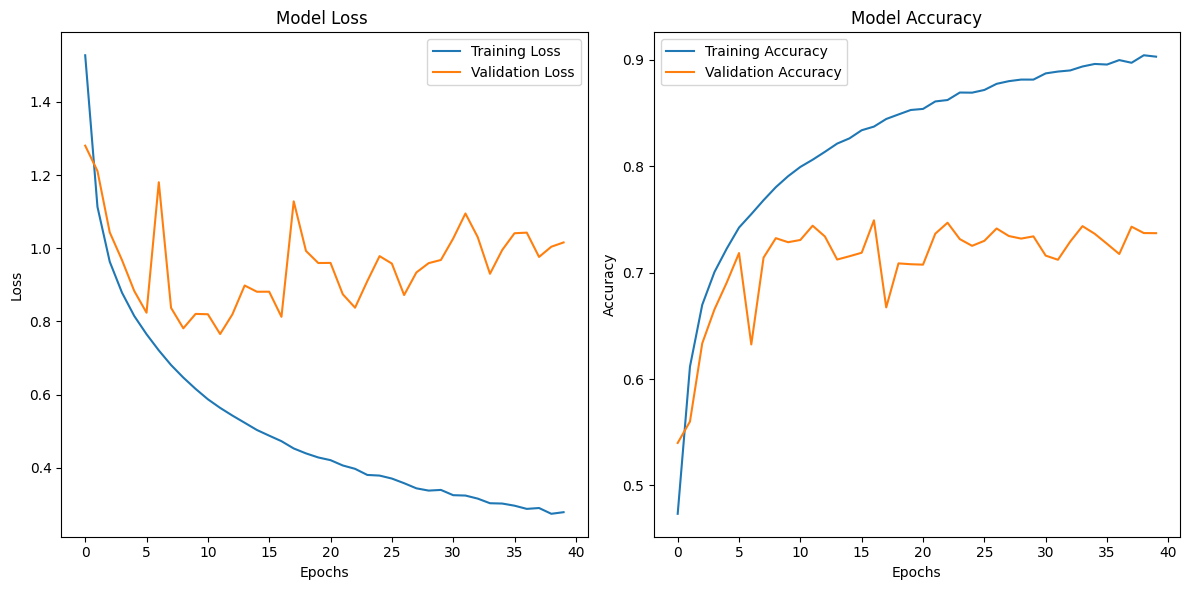

In [22]:
plot_graph(history_model_acitvation)